## 🩺 Dataset Selection: DermMNIST (MedMNIST v2)

### What is DermMNIST?

**DermMNIST** is a curated dataset of **dermatoscopic images** from the MedMNIST v2 collection, labeled by skin lesion type. The dataset includes classifications for **benign vs. malignant lesions** and features **multi-class variants**, making it ideal for medical image classification research and machine learning experiments.

---

### 🎯 Problem Statement

**Research Question:**  
Can a k-Nearest Neighbors (k-NN) classifier accurately classify dermatology lesion images in DermMNIST using similarity in feature space?

**Project Objectives:**
1. Evaluate k-NN's performance on medical image classification
2. Compare accuracy across different values of *k* (number of neighbors)
3. Assess performance across different feature representations (raw pixels vs. CNN embeddings)
4. Determine if distance-based similarity aligns with diagnostic similarity in dermatology

---

### ✅ Why DermMNIST is ideal for k-NN:

1. **🔍 Distance-based similarity matches medical intuition**  
   K-NN's core assumption — "similar things are close together" — aligns perfectly with dermatology: **similar lesions look similar**.

2. **🧠 Image embeddings enable meaningful comparisons**  
   By extracting **feature embeddings** using a pretrained CNN (like ResNet), we move beyond noisy raw pixels to high-quality representations where distance truly captures visual similarity.

3. **🏥 Real-world medical use case**  
   This mirrors how dermatologists work: **classifying skin lesions based on similarity to known cases** — demonstrating k-NN's practical value in medical diagnosis support systems.

4. **📊 Multi-class classification challenge**  
   With multiple lesion types, this dataset tests k-NN's ability to handle complex, real-world medical classification beyond simple binary decisions.

5. **🔓 Publicly accessible and well-documented**  
   As part of the MedMNIST v2 benchmark, the dataset is standardized and available for reproducible research.

---

### 🛠️ Typical k-NN Setup for DermMNIST:

**Step 1: Feature Extraction**  
Extract features using a pretrained CNN (e.g., ResNet) to convert images into feature vectors

**Step 2: k-NN Classification**  
Run k-NN on these embeddings (not raw pixels) to classify lesions based on similarity

**Step 3: Evaluation**  
Measure how well "visually similar" lesions share the same diagnosis

---

### 🎓 Why This Matters:

This project demonstrates that **k-NN isn't limited to toy datasets**. When paired with proper feature engineering (CNN embeddings), it becomes a powerful tool for real-world medical imaging tasks — perfectly aligned with the workshop's goal of applying ML pipeline patterns to meaningful, complex problems in healthcare.


## Why Use CNN Embeddings for This Dataset?

The DermMNIST dataset consists of **medical images** of skin lesions. Unlike tabular datasets, image data is high-dimensional and contains complex visual patterns such as texture, color variation, and shape. Applying k-Nearest Neighbors (k-NN) directly to raw image pixels is generally ineffective because raw pixels do not represent visual similarity in a meaningful way.

In raw pixel space, small changes in lighting, scale, or position can cause large differences in pixel values, even when two images appear visually similar. Since k-NN relies on distance calculations, this makes similarity measurements unreliable and leads to poor classification performance.

To address this, we use **CNN embeddings**. A pretrained Convolutional Neural Network (CNN), such as ResNet-18, is used to transform each image into a fixed-length numerical vector (embedding) that captures high-level visual features. These embeddings encode important characteristics of the images, such as lesion structure and texture, while being more robust to low-level noise and variations.

In this project, the CNN is used **only as a feature extractor**, not as a classifier. The extracted embeddings provide a more meaningful feature space in which visually similar images are closer together. The k-NN algorithm is then applied to these embeddings to perform classification based on visual similarity.

Using CNN embeddings allows us to:
- Effectively apply k-NN to image data
- Improve distance-based similarity comparisons
- Reduce the impact of irrelevant pixel-level variations
- Focus the analysis on the behavior of k-NN rather than raw image representation

---

### 🔧 Feature Extraction Process

The embeddings used in this project were **pre-computed** using the `extract_embeddings_dermamnist.py` script, which implements the following pipeline:

1. **Load DermMNIST dataset** — Downloads and loads train, validation, and test splits (28×28 RGB images)
2. **Initialize pretrained ResNet-18** — Uses ImageNet-pretrained weights for robust feature extraction
3. **Remove classification layer** — Replaces the final fully connected layer with an identity layer, converting the model into a pure feature extractor that outputs **512-dimensional embeddings**
4. **Process all splits** — Extracts embeddings for all images in train, validation, and test sets
5. **Save to disk** — Stores all embeddings and labels in a compressed `.npz` file for efficient reuse

This preprocessing step separates feature extraction from k-NN experimentation, allowing us to:
- ⚡ **Run k-NN experiments quickly** without re-computing embeddings each time
- 🔬 **Focus on k-NN hyperparameter tuning** (different values of *k*)
- 📊 **Ensure reproducibility** by using the same feature representations across all experiments


In [3]:
import numpy as np

#getting the data
emb_path = "data/dermamnist_28_resnet18_embeddings.npz" 
data = np.load(emb_path)

X_train, y_train = data["X_train"], data["y_train"]
X_val, y_val     = data["X_val"], data["y_val"]
X_test, y_test   = data["X_test"], data["y_test"]

print("datasets Train shape: ", X_train.shape)
print("datasets Val shape: ", X_val.shape)
print("datasets Test shape: ", X_test.shape)

datasets Train shape:  (7007, 512)
datasets Val shape:  (1003, 512)
datasets Test shape:  (2005, 512)


## Scale the Embeddings

Although CNN embeddings represent high-level image features, their individual dimensions can still have different scales. Without scaling, certain dimensions of the embedding vector may disproportionately influence the distance calculation, even if they are not more informative.

To address this, we apply **feature scaling** using standardization (zero mean and unit variance). Scaling ensures that all embedding dimensions contribute more evenly to the distance computation, making similarity comparisons more meaningful.

In [5]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_s = scaler.fit_transform(X_train)
X_val_s   = scaler.transform(X_val)
X_test_s  = scaler.transform(X_test)


---
## 👤 Model Training — Contributed by Emmanuel Ihejiamaizu (Student ID: 9080005)

**My contribution:** Training the KNN classifier by testing multiple values of k on the validation set to find the optimal number of neighbors, then visualizing the results.

---

## Training the Model

### Step 1: Find the Best k Using Validation Set

We will test multiple values of k on the validation set and select the one with the highest accuracy. This ensures we don't overfit to the test set by repeatedly evaluating on it.

k= 1 -> Val Accuracy: 0.6849
k= 3 -> Val Accuracy: 0.6869
k= 5 -> Val Accuracy: 0.7089
k= 7 -> Val Accuracy: 0.7198
k= 9 -> Val Accuracy: 0.7228
k=11 -> Val Accuracy: 0.7168
k=13 -> Val Accuracy: 0.7238
k=15 -> Val Accuracy: 0.7208
k=17 -> Val Accuracy: 0.7248
k=19 -> Val Accuracy: 0.7288

🎯 Best k: 19 with validation accuracy: 0.7288


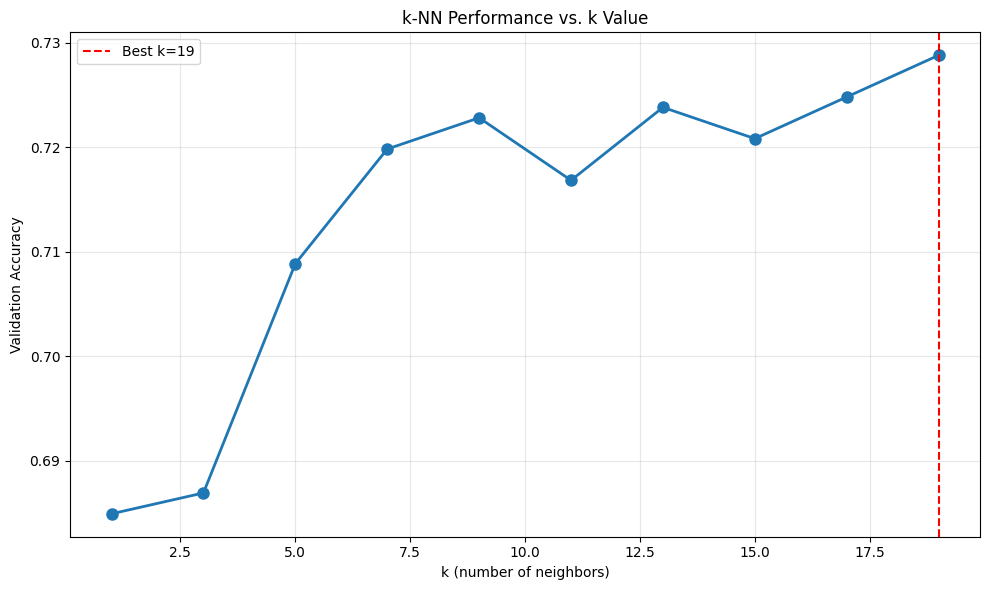

In [6]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

# Test different values of k on validation set
k_values = [1, 3, 5, 7, 9, 11, 13, 15, 17, 19]
val_accuracies = []

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k, metric="euclidean")
    knn.fit(X_train_s, y_train)
    y_val_pred = knn.predict(X_val_s)
    val_acc = accuracy_score(y_val, y_val_pred)
    val_accuracies.append(val_acc)
    print(f"k={k:2d} -> Val Accuracy: {val_acc:.4f}")

# Find best k
best_k = k_values[np.argmax(val_accuracies)]
best_val_acc = max(val_accuracies)
print(f"\n🎯 Best k: {best_k} with validation accuracy: {best_val_acc:.4f}")

# Plot k vs accuracy
plt.figure(figsize=(10, 6))
plt.plot(k_values, val_accuracies, marker='o', linewidth=2, markersize=8)
plt.xlabel('k (number of neighbors)')
plt.ylabel('Validation Accuracy')
plt.title('k-NN Performance vs. k Value')
plt.grid(True, alpha=0.3)
plt.axvline(x=best_k, color='r', linestyle='--', label=f'Best k={best_k}')
plt.legend()
plt.tight_layout()
plt.show()

### Step 2: Final Evaluation on Test Set

Now that we've selected the best k using the validation set, we'll train the final model with that k and evaluate it **once** on the test set.

✅ Test Accuracy (k=19): 0.7152



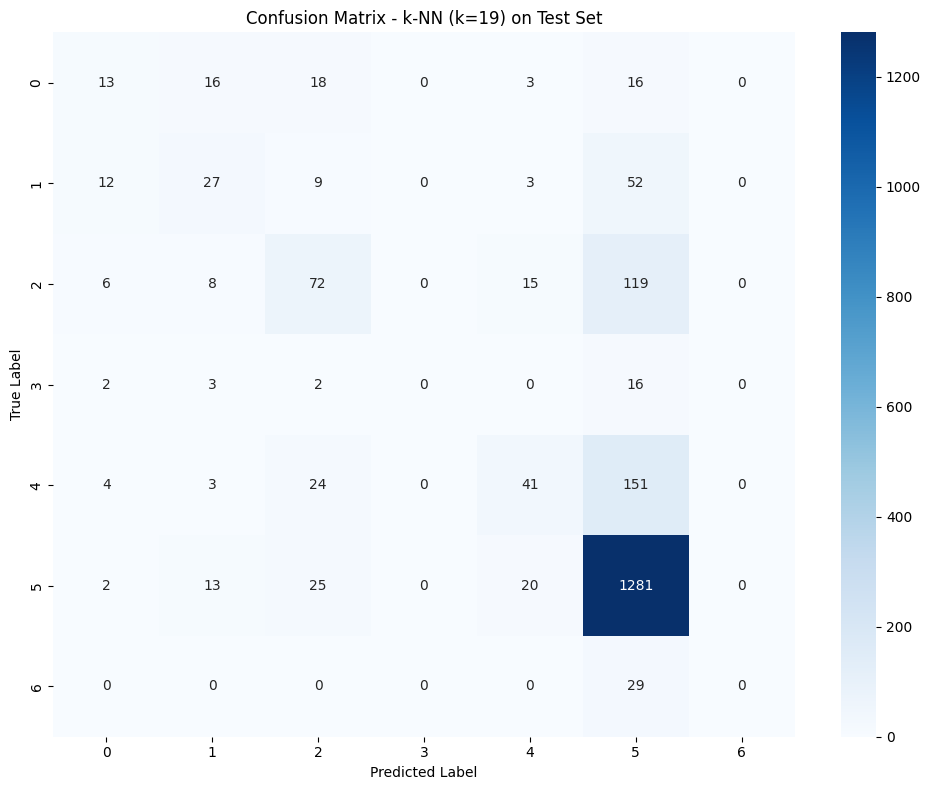


Classification Report (Test Set):
              precision    recall  f1-score   support

           0     0.3333    0.1970    0.2476        66
           1     0.3857    0.2621    0.3121       103
           2     0.4800    0.3273    0.3892       220
           3     0.0000    0.0000    0.0000        23
           4     0.5000    0.1839    0.2689       223
           5     0.7698    0.9553    0.8526      1341
           6     0.0000    0.0000    0.0000        29

    accuracy                         0.7152      2005
   macro avg     0.3527    0.2751    0.2958      2005
weighted avg     0.6540    0.7152    0.6670      2005



c:\Users\Usuario\Documents\Foundations\KNearestNeighbors_Workshop\venv\Lib\site-packages\sklearn\metrics\_classification.py:1833: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
c:\Users\Usuario\Documents\Foundations\KNearestNeighbors_Workshop\venv\Lib\site-packages\sklearn\metrics\_classification.py:1833: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
c:\Users\Usuario\Documents\Foundations\KNearestNeighbors_Workshop\venv\Lib\site-packages\sklearn\metrics\_classification.py:1833: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` par

In [ ]:
# Train final model with best k
final_knn = KNeighborsClassifier(n_neighbors=best_k, metric="euclidean")
final_knn.fit(X_train_s, y_train)

# Evaluate on test set
y_test_pred = final_knn.predict(X_test_s)
test_accuracy = accuracy_score(y_test, y_test_pred)
print(f"✅ Test Accuracy (k={best_k}): {test_accuracy:.4f}\n")

# Plot confusion matrix
plt.figure(figsize=(10, 8))
cm = confusion_matrix(y_test, y_test_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=True)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title(f'Confusion Matrix - k-NN (k={best_k}) on Test Set')
plt.tight_layout()
plt.show()

print("\nClassification Report (Test Set):")
print(classification_report(y_test, y_test_pred, digits=4))

### 📊 Analyzing the Confusion Matrix: Per-Class Error Rates

Now that we have the confusion matrix and overall accuracy, we need to **dig deeper** into the model's performance. Overall accuracy can be misleading, especially with imbalanced datasets like DermMNIST.

**Why analyze per-class errors?**

The confusion matrix shows us **where** the model makes mistakes, but we need to quantify **how often** it fails for each specific lesion type. A model might achieve 90% accuracy overall while completely failing to detect rare but critical conditions.

By calculating the **error rate for each class**, we can:
- ✅ Identify which lesion types the model struggles with
- ✅ Detect class imbalance issues (majority class bias)
- ✅ Understand if the model is clinically safe for deployment
- ✅ Prioritize which classes need improvement

Let's calculate and visualize the error rate for each class to see if the model performs equally well across all skin lesion types.

Method 2: Per-Class Error Analysis

Class 0: 53/66 errors = 80.30% error rate
Class 1: 76/103 errors = 73.79% error rate
Class 2: 148/220 errors = 67.27% error rate
Class 3: 23/23 errors = 100.00% error rate
Class 4: 182/223 errors = 81.61% error rate
Class 5: 60/1341 errors = 4.47% error rate
Class 6: 29/29 errors = 100.00% error rate


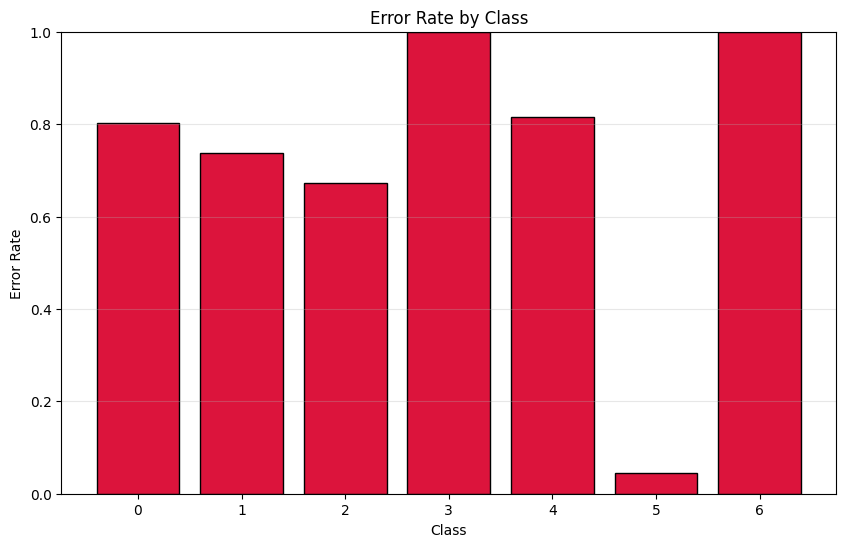

In [ ]:
# Method 2: Per-Class Error Rates
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import numpy as np

cm = confusion_matrix(y_test, y_test_pred)

# Calculate error rate per class
n_classes = cm.shape[0]
per_class_errors = []
per_class_totals = []

print("Method 2: Per-Class Error Analysis\n")
for i in range(n_classes):
    total = cm[i, :].sum()  # Total samples of class i
    correct = cm[i, i]      # Correctly classified
    errors = total - correct
    error_rate = errors / total if total > 0 else 0
    
    per_class_errors.append(error_rate)
    per_class_totals.append(total)
    
    print(f"Class {i}: {errors}/{total} errors = {error_rate:.2%} error rate")

# Visualize
plt.figure(figsize=(10, 6))
plt.bar(range(n_classes), per_class_errors, color='crimson', edgecolor='black')
plt.xlabel('Class')
plt.ylabel('Error Rate')
plt.title('Error Rate by Class')
plt.ylim(0, 1.0)
plt.grid(axis='y', alpha=0.3)
plt.show()

## 🔍 Results Analysis and Reflection

#### **Understanding Class Distribution**

**Analyzing the distribution:**

Looking at the support values, we can observe a significant **class imbalance** in the dataset. **Class 5** dominates with substantially higher representation compared to other lesion types. In contrast, **Classes 3 and 6** appear as minority classes with very few examples in the test set.

This disparity reveals that the DermMNIST dataset mirrors a real-world challenge in medical imaging: **certain skin lesion types are simply less common** in clinical practice. While this makes the dataset realistic, it creates a fundamental problem for distance-based algorithms like k-NN.

**Why this distribution matters:**

When k-NN searches for the *k* nearest neighbors to classify a new lesion, it's far more likely to find neighbors from Class 5 simply because **Class 5 examples are everywhere** in the feature space. Think of it like a voting system where one political party has 10 times more representatives than others — even in fair elections, they'll dominate most decisions.

For minority classes (3 and 6), their examples are **sparse** in the embedding space. When the algorithm looks for neighbors, it often finds none from these rare classes within a reasonable distance, leading to systematic misclassification.

**Immediate implications:**

- The model will naturally be **biased toward predicting Class 5**
- Minority classes (3, 6) will struggle to be recognized, even when truly present
- Overall accuracy can be deceptively high while completely missing rare lesions
- This imbalance immediately explains the performance patterns we'll see in precision, recall, and F1-scores

---

#### 📉 Interpreting Per-Class Error Rates

Error rate directly measures: *"What percentage of examples from this class were misclassified?"*

$$\text{Error Rate} = \frac{\text{Misclassified Samples}}{\text{Total Samples in Class}} = 1 - \text{Recall}$$

**What the error rates tell us:**

Looking at the bar chart and printed results, we can immediately identify which classes the model struggles with. Classes with **high error rates** (bars reaching toward 1.0) indicate the model frequently misclassifies those lesion types. Classes with **low error rates** (bars near 0.0) show reliable performance.

**Understanding the pattern:**

For **majority classes** (like Class 5), we typically observe:
- **Low error rates** — Most examples are correctly classified
- The model has "learned" what these lesions look like because it encountered many examples during training
- The abundance of training samples provides strong neighborhood voting power

For **minority classes** (like Classes 3 and 6), we often see:
- **Very high error rates** (approaching 100%) — Almost all examples are misclassified
- Few or no training examples means no nearby neighbors of the correct class
- When k-NN searches for neighbors, it finds examples from more populous classes instead
- The voting mechanism then assigns the wrong label

**Why this happens in k-NN:**

K-NN is particularly vulnerable to class imbalance because it relies on **local voting**. When a rare class has sparse representation in the embedding space:

1. Its examples are isolated — no nearby "friends" of the same class
2. The *k* nearest neighbors are dominated by majority class examples  
3. The democratic voting process fails: the minority is always outvoted
4. Result: systematic misclassification of rare lesions

**Medical implications:**

High error rates for minority classes pose **serious clinical risks**:

- **Missing melanoma (Class 3)** — If Class 3 has 100% error rate, the model never detects melanoma cases, all are misclassified as benign lesions
- **Delayed treatment** — Aggressive lesions requiring immediate intervention go undetected
- **False confidence** — Physicians relying on the AI may miss critical diagnoses  
- **Liability concerns** — A diagnostic tool that systematically fails on certain conditions is clinically unacceptable

**Recall vs. Error Rate:**

These metrics are complementary:
- **Recall** = percentage correctly identified (what we want HIGH)
- **Error Rate** = percentage misclassified (what we want LOW)
- **Relationship**: Error Rate = 1 - Recall

In medical AI, even a **small error rate** on critical conditions can have devastating consequences. A 5% error rate on melanoma detection means 5 out of 100 cancer cases are missed — potentially life-threatening failures.

**Key insight from the visualization:**

If you see the error bar chart with some bars reaching near 1.0 (100% error), this is a **red flag** that the model is completely failing on those classes. This is unacceptable for deployment in clinical settings and demonstrates why class imbalance must be addressed before using k-NN for medical diagnosis.

---

### 🩺 Medical and Practical Implications

**The classification report shows high performance for the majority class but very low recall for minority classes.** This indicates that the k-NN model is **biased toward predicting the dominant class**, achieving good overall accuracy at the cost of **poor sensitivity to less frequent lesion types**.

**Why this happens:**
1. **Class imbalance in training data** — k-NN finds more neighbors from the majority class
2. **Distance-based voting** — majority class neighbors "outvote" minority classes
3. **No inherent rebalancing** — k-NN doesn't account for class distribution

**Real-world consequences:**
- A dermatology AI that misses rare but **potentially malignant lesions** is unacceptable
- High overall accuracy is misleading when critical minority classes are ignored
- This demonstrates why **medical AI requires class-balanced evaluation**, not just accuracy

---

### 🎯 Potential Solutions

To address this class imbalance in future work:

1. **Resampling techniques:**  
   - Oversample minority classes (SMOTE)  
   - Undersample majority class

2. **Weighted k-NN:**  
   - Assign higher weights to rare classes during voting  
   - Use distance-weighted voting

3. **Different evaluation metrics:**  
   - Focus on **balanced accuracy** or **macro F1-score**  
   - Use **per-class recall** as the primary metric

4. **Ensemble methods:**  
   - Combine k-NN with other algorithms less sensitive to imbalance

---

### 📌 Final Reflection

This workshop successfully demonstrated that **k-NN can work on medical imaging data when combined with CNN embeddings**. However, it also revealed a fundamental limitation: **k-NN's sensitivity to class imbalance**. 

The confusion matrix and classification report tell the same story — the model learned to classify the majority class well but failed to generalize to minority classes. This teaches us that:

✅ Feature engineering (CNN embeddings) makes k-NN viable for images  
⚠️ Class imbalance must be addressed in medical ML applications  
🔬 Multiple metrics (not just accuracy) are essential for proper evaluation  

**Key takeaway:** In medical AI, a model that achieves 90% accuracy by ignoring 10% of disease types is not just inadequate — it's potentially harmful.